
## INE Instituto nacional de estadística

In [1]:
%load_ext autoreload
%autoreload 2
import json
import os
import re
import sys
from datetime import date
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests

cwd = Path.cwd()
home = Path.home()
module_path = f"{home}/serhi/src/lib" if cwd == home else f"{cwd.parents[1]}/lib"
sys.path.append(module_path)
import serhi

SerHi Tools


In [2]:
# inicio
# cambiar como corresponda
ENTITY = "ine"
NB_NAME = "ine_ipri"
serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ine
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ine/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ine/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ine/ine_ipri.csv


serhi.CWD /home/node
serhi.BASE_PATH ../../..
serhi.DATA_PATH ../../../data/process/ine/
serhi.DOWN_PATH ../../../tmp/download/ine/
serhi.OUT_FILE ../../../data/process/ine/ine_ipri.csv


PermissionError: [Errno 13] Permission denied: '../../../data'

In [3]:
print(dir(serhi))

['BASE_PATH', 'CWD', 'DATA_PATH', 'DOWN_PATH', 'HOME', 'OUT_FILE', 'Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'download_files', 'initialize', 'os', 'requests']


In [4]:
def download_files(urls):
    for loc in urls:
        url = loc["url"]
        r = requests.get(url, allow_redirects=True)
        print(f"Downloading {url}")
        open(serhi.DOWN_PATH + loc["file"], "wb").write(r.content)


urls = [
    # ipri
    {
        "url": "https://www.ine.es/jaxiT3/files/t/es/xlsx/27065.xlsx?nocab=1",
        "file": "ine_ipri.xlsx",
    },
]

download_files(urls)

In [5]:
# IPRI
loc = urls[0]
file = loc["file"]
df = pd.read_excel(serhi.DOWN_PATH + file, skiprows=6, nrows=162, header=(0, 1))
df.head()

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Índice                             \
                                          2023M01  2022M12  2022M11  2022M10   
0                               Nacional      NaN      NaN      NaN      NaN   
1                        Total industria  153.442  156.558  159.166  162.972   
2                      Bienes de consumo  127.289  124.333  123.414  122.432   
3             Bienes de consumo duradero  118.439  117.583  117.394  117.492   
4          Bienes de consumo no duradero  127.795  124.721  123.762  122.720   

                                                ...  \
   2022M09  2022M08  2022M07  2022M06  2022M05  ...   
0      NaN      NaN      NaN      NaN      NaN  ...   
1  166.871  166.943  162.480  161.564  158.077  ...   
2  120.856  119.898  118.918  117.908  117.539  ...   
3  117.052  116.471  116.261  116.071  115.328  ...   
4  121.081  120.103  119.080  118.025  117.677  ...   

  Variación en lo que va de año                                          \
                        1975M10 1975M09 1975M08 1975M07 1975M06 1975M05   
0                           NaN     NaN     NaN     NaN     NaN     NaN   
1                                                                         
2                                                                         
3                                                                         
4                                                                         

                                   
  1975M04 1975M03 1975M02 1975M01  
0     NaN     NaN     NaN     NaN  
1                                  
2                                  
3                                  
4                                  

[5 rows x 2309 columns]

In [6]:
df.tail()

Índice                    \
                                            2023M01  2022M12  2022M11   
157          Bienes de consumo no duradero  116.611  115.771  115.192   
158                       Bienes de equipo  103.210  101.497  101.643   
159                     Bienes intermedios  136.910  134.831  134.794   
160                                Energía  213.880  232.959  237.115   
161            Total industria sin energía  122.010  120.639  120.306   

                                                           ...  \
     2022M10  2022M09  2022M08  2022M07  2022M06  2022M05  ...   
157  114.737  114.303  114.101  113.737  112.304  111.898  ...   
158  101.695  101.470  101.614  101.762  101.366  101.293  ...   
159  133.569  131.246  130.392  128.208  125.814  125.641  ...   
160  254.557  288.223  281.789  240.332  226.789  223.572  ...   
161  119.654  118.643  118.264  117.364  115.743  115.448  ...   

    Variación en lo que va de año                                          \
                          1975M10 1975M09 1975M08 1975M07 1975M06 1975M05   
157                                                                         
158                                                                         
159                                                                         
160                                                                         
161                                                                         

                                     
    1975M04 1975M03 1975M02 1975M01  
157                                  
158                                  
159                                  
160                                  
161                                  

[5 rows x 2309 columns]

In [7]:
df.columns.levels[0]

Index([' ', 'Variación anual', 'Variación en lo que va de año',
       'Variación mensual', 'Índice'],
      dtype='object')

In [8]:
df = df.rename(columns={" ": "Name"})

In [9]:
# da = df.xs('Índice', axis=1, level=0, drop_level=True)

In [10]:
df = df[['Name', 'Índice']]

In [11]:
df

Name   Índice                    \
                                      Name  2023M01  2022M12  2022M11   
0                                 Nacional      NaN      NaN      NaN   
1                          Total industria  153.442  156.558  159.166   
2                        Bienes de consumo  127.289  124.333  123.414   
3               Bienes de consumo duradero  118.439  117.583  117.394   
4            Bienes de consumo no duradero  127.795  124.721  123.762   
..                                     ...      ...      ...      ...   
157          Bienes de consumo no duradero  116.611  115.771  115.192   
158                       Bienes de equipo  103.210  101.497  101.643   
159                     Bienes intermedios  136.910  134.831  134.794   
160                                Energía  213.880  232.959  237.115   
161            Total industria sin energía  122.010  120.639  120.306   

                                                           ...          \
     2022M10  2022M09  2022M08  2022M07  2022M06  2022M05  ... 1975M10   
0        NaN      NaN      NaN      NaN      NaN      NaN  ...     NaN   
1    162.972  166.871  166.943  162.480  161.564  158.077  ...  13.287   
2    122.432  120.856  119.898  118.918  117.908  117.539  ...  13.519   
3    117.492  117.052  116.471  116.261  116.071  115.328  ...    15.1   
4    122.720  121.081  120.103  119.080  118.025  117.677  ...   13.29   
..       ...      ...      ...      ...      ...      ...  ...     ...   
157  114.737  114.303  114.101  113.737  112.304  111.898  ...           
158  101.695  101.470  101.614  101.762  101.366  101.293  ...           
159  133.569  131.246  130.392  128.208  125.814  125.641  ...           
160  254.557  288.223  281.789  240.332  226.789  223.572  ...           
161  119.654  118.643  118.264  117.364  115.743  115.448  ...           

                                                                             
    1975M09 1975M08 1975M07 1975M06 1975M05 1975M04 1975M03 1975M02 1975M01  
0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1    13.208  13.128  13.128  13.049  13.049  12.889  12.889   12.81  12.571  
2    13.519  13.435  13.351  13.351  13.267  13.099  13.015  12.931  12.847  
3    15.013  15.013  14.926  14.926  14.838  14.664  14.489  14.489  14.489  
4    13.207  13.207  13.123  13.039  13.039  12.872  12.705  12.705  12.538  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
157                                                                          
158                                                                          
159                                                                          
160                                                                          
161                                                                          

[162 rows x 578 columns]

In [12]:
df.columns = df.columns.droplevel()
df

,Name,2023M01,2022M12,2022M11,2022M10,2022M09,2022M08,2022M07,2022M06,2022M05,...,1975M10,1975M09,1975M08,1975M07,1975M06,1975M05,1975M04,1975M03,1975M02,1975M01
0,Nacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total industria,153.442,156.558,159.166,162.972,166.871,166.943,162.480,161.564,158.077,...,13.287,13.208,13.128,13.128,13.049,13.049,12.889,12.889,12.81,12.571
2,Bienes de consumo,127.289,124.333,123.414,122.432,120.856,119.898,118.918,117.908,117.539,...,13.519,13.519,13.435,13.351,13.351,13.267,13.099,13.015,12.931,12.847
3,Bienes de consumo duradero,118.439,117.583,117.394,117.492,117.052,116.471,116.261,116.071,115.328,...,15.1,15.013,15.013,14.926,14.926,14.838,14.664,14.489,14.489,14.489
4,Bienes de consumo no duradero,127.795,124.721,123.762,122.720,121.081,120.103,119.080,118.025,117.677,...,13.29,13.207,13.207,13.123,13.039,13.039,12.872,12.705,12.705,12.538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Bienes de consumo no duradero,116.611,115.771,115.192,114.737,114.303,114.101,113.737,112.304,111.898,...,,,,,,,,,,
158,Bienes de equipo,103.210,101.497,101.643,101.695,101.470,101.614,101.762,101.366,101.293,...,,,,,,,,,,
159,Bienes intermedios,136.910,134.831,134.794,133.569,131.246,130.392,128.208,125.814,125.641,...,,,,,,,,,,
160,Energía,213.880,232.959,237.115,254.557,288.223,281.789,240.332,226.789,223.572,...,,,,,,,,,,


In [13]:
def ine_sheet_ccaa(df, set_name, nccaa=18, ndatos=9, ud="idx"):
    dr = pd.DataFrame()
    for i in range(0, nccaa):
        # get next rows
        dt = df.loc[i * ndatos : i * ndatos + (ndatos - 1)]
        dt.reset_index(inplace=True, drop=True)
        # save zone
        zone = dt.loc[0][0]
        # delete first row
        dt = dt.loc[1:]
        # change columns names - to months
        columns = [w.replace("M", "-") for w in dt.columns]
        columns = [re.sub(r"\.[0-9]", "", w) for w in columns]
        columns = [w + "-01" for w in columns]
        columns[0] = "Name"
        dt.columns = columns
        dt = dt.T
        # promote columns
        dt.columns = dt.iloc[0]
        dt = dt[1:]
        dt.columns = [w.strip() for w in dt.columns]
        # change index name
        dt.index.rename("Date", inplace=True)
        # sort and scale
        dt.sort_index(ascending=True, inplace=True)
        # transpose
        dt = dt.unstack()
        dt = dt.reset_index()
        # set zone
        dt["Zone"] = zone
        dt["Ud"] = ud
        # set column value
        dt = dt.rename(columns={0: "Value"})
        # concat
        dr = pd.concat([dr, dt])

    dr["Set"] = set_name
    dr.rename(columns={"level_0": "Name"}, inplace=True)
    return dr

In [14]:
df = ine_sheet_ccaa(df, set_name="INE_IPRI")
df.head()

,Name,Date,Value,Zone,Ud,Set
0,Total industria,1975-01-01,12.571,Nacional,idx,INE_IPRI
1,Total industria,1975-02-01,12.81,Nacional,idx,INE_IPRI
2,Total industria,1975-03-01,12.889,Nacional,idx,INE_IPRI
3,Total industria,1975-04-01,12.889,Nacional,idx,INE_IPRI
4,Total industria,1975-05-01,13.049,Nacional,idx,INE_IPRI


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83088 entries, 0 to 4615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    83088 non-null  object
 1   Date    83088 non-null  object
 2   Value   83088 non-null  object
 3   Zone    83088 non-null  object
 4   Ud      83088 non-null  object
 5   Set     83088 non-null  object
dtypes: object(6)
memory usage: 4.4+ MB


In [16]:
df["Name"].unique()

array(['Total industria', 'Bienes de consumo',
       'Bienes de consumo duradero', 'Bienes de consumo no duradero',
       'Bienes de equipo', 'Bienes intermedios', 'Energía',
       'Total industria sin energía'], dtype=object)

In [17]:
df["Zone"].unique()

array(['Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La'],
      dtype=object)

In [18]:
df

,Name,Date,Value,Zone,Ud,Set
0,Total industria,1975-01-01,12.571,Nacional,idx,INE_IPRI
1,Total industria,1975-02-01,12.81,Nacional,idx,INE_IPRI
2,Total industria,1975-03-01,12.889,Nacional,idx,INE_IPRI
3,Total industria,1975-04-01,12.889,Nacional,idx,INE_IPRI
4,Total industria,1975-05-01,13.049,Nacional,idx,INE_IPRI
...,...,...,...,...,...,...
4611,Total industria sin energía,2022-09-01,118.643,"17 Rioja, La",idx,INE_IPRI
4612,Total industria sin energía,2022-10-01,119.654,"17 Rioja, La",idx,INE_IPRI
4613,Total industria sin energía,2022-11-01,120.306,"17 Rioja, La",idx,INE_IPRI
4614,Total industria sin energía,2022-12-01,120.639,"17 Rioja, La",idx,INE_IPRI


In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].agg(["min", "max"])

min   1975-01-01
max   2023-01-01
Name: Date, dtype: datetime64[ns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83088 entries, 0 to 4615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    83088 non-null  object        
 1   Date    83088 non-null  datetime64[ns]
 2   Value   83088 non-null  object        
 3   Zone    83088 non-null  object        
 4   Ud      83088 non-null  object        
 5   Set     83088 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.4+ MB


In [21]:
# fill na with 0
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
df["Value"] = df["Value"].fillna(0)

Nacional


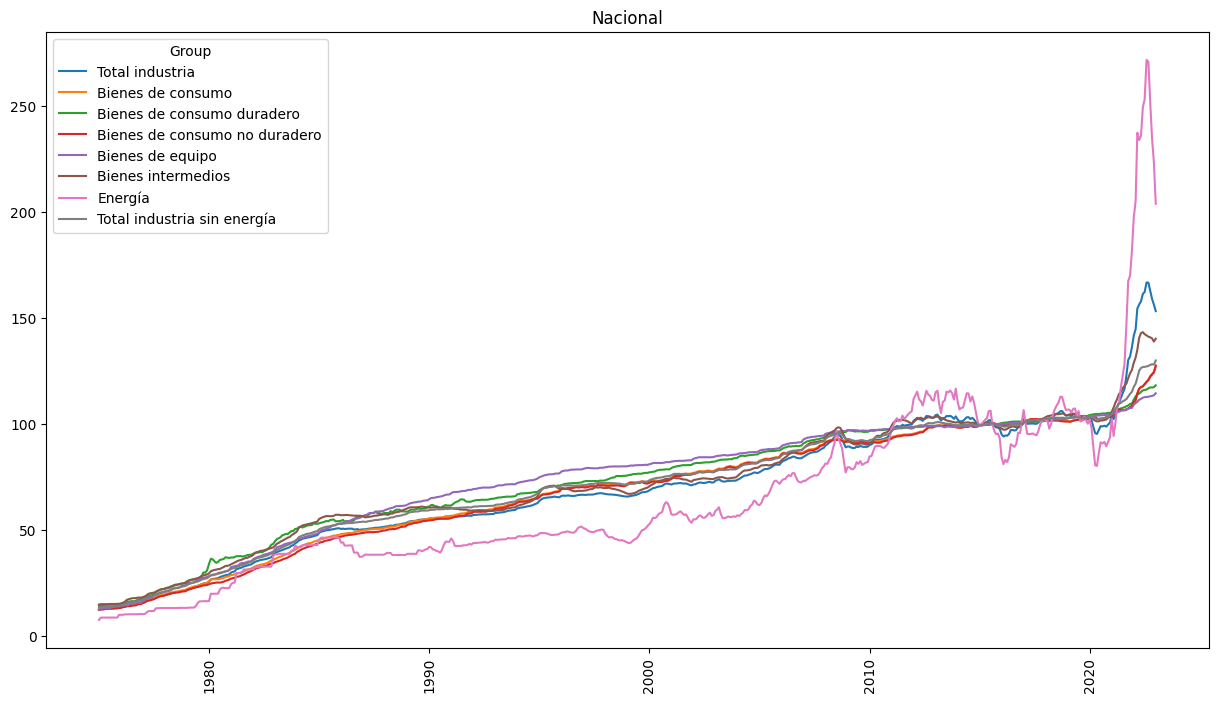

01 Andalucía


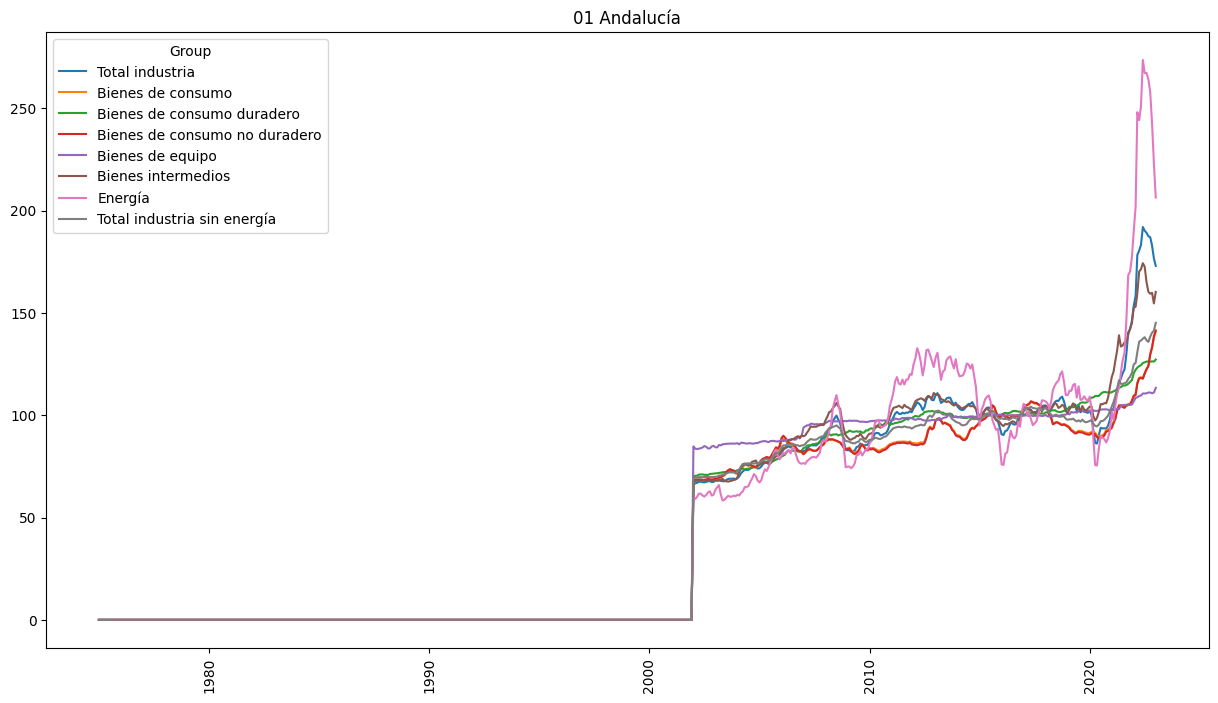

02 Aragón


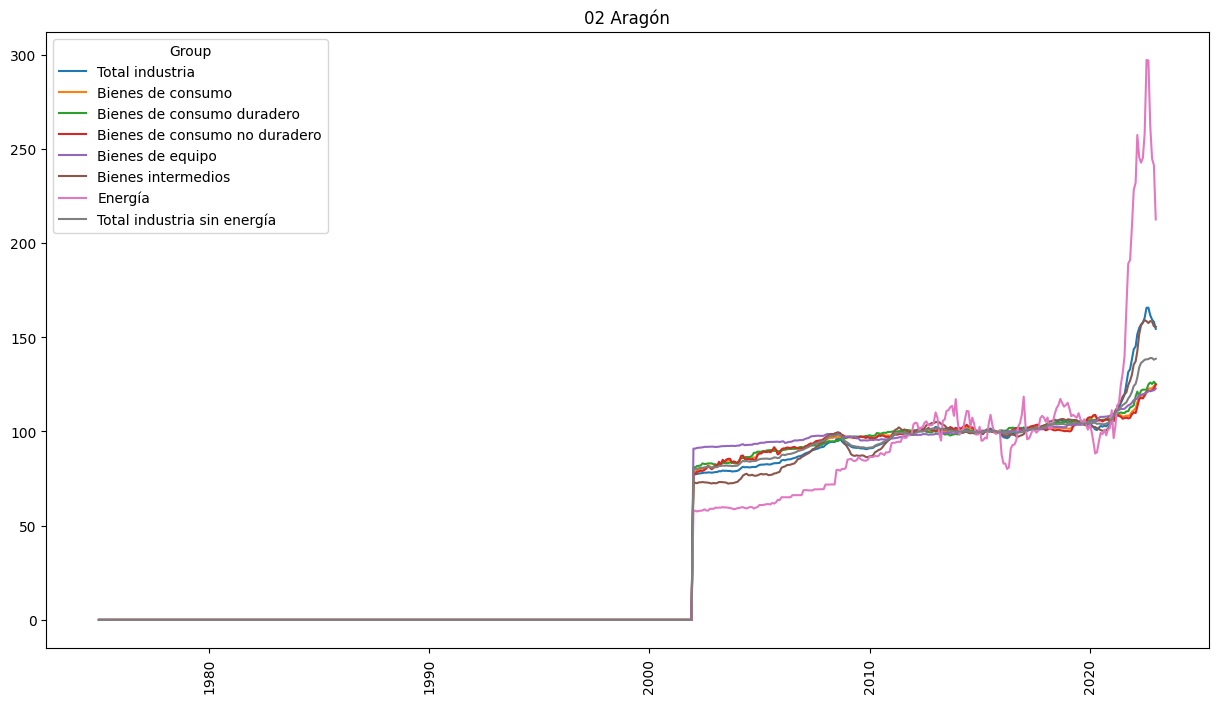

03 Asturias, Principado de


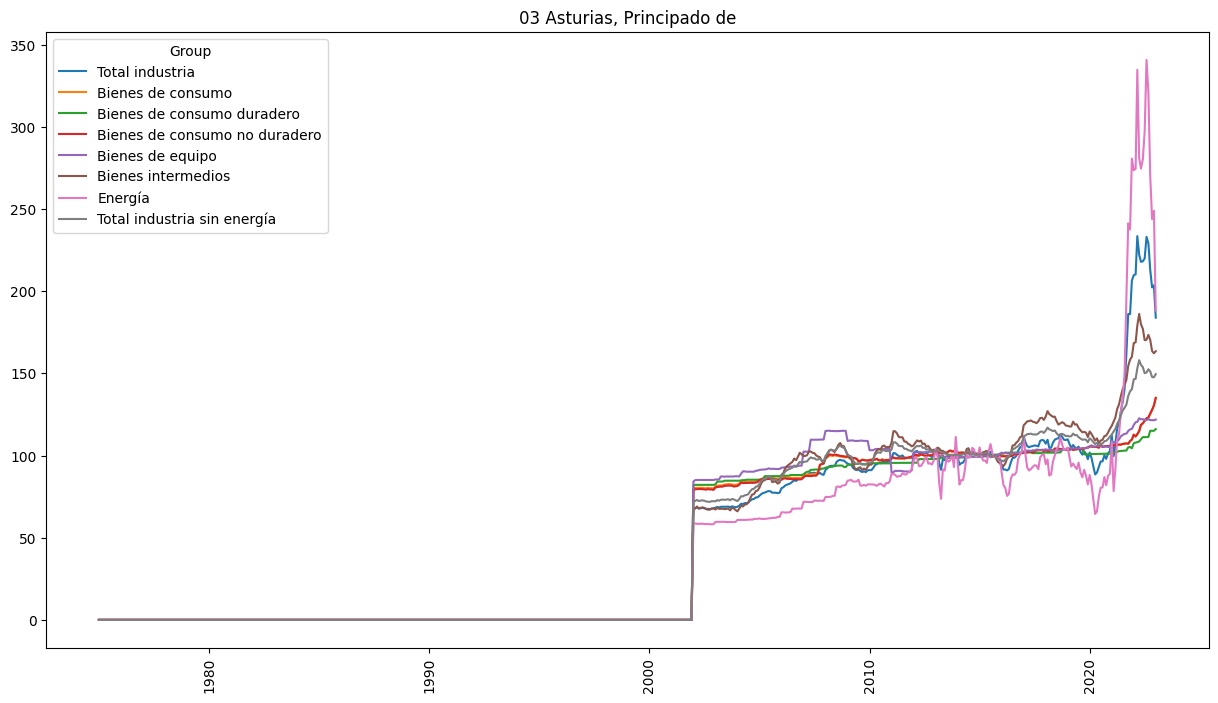

04 Balears, Illes


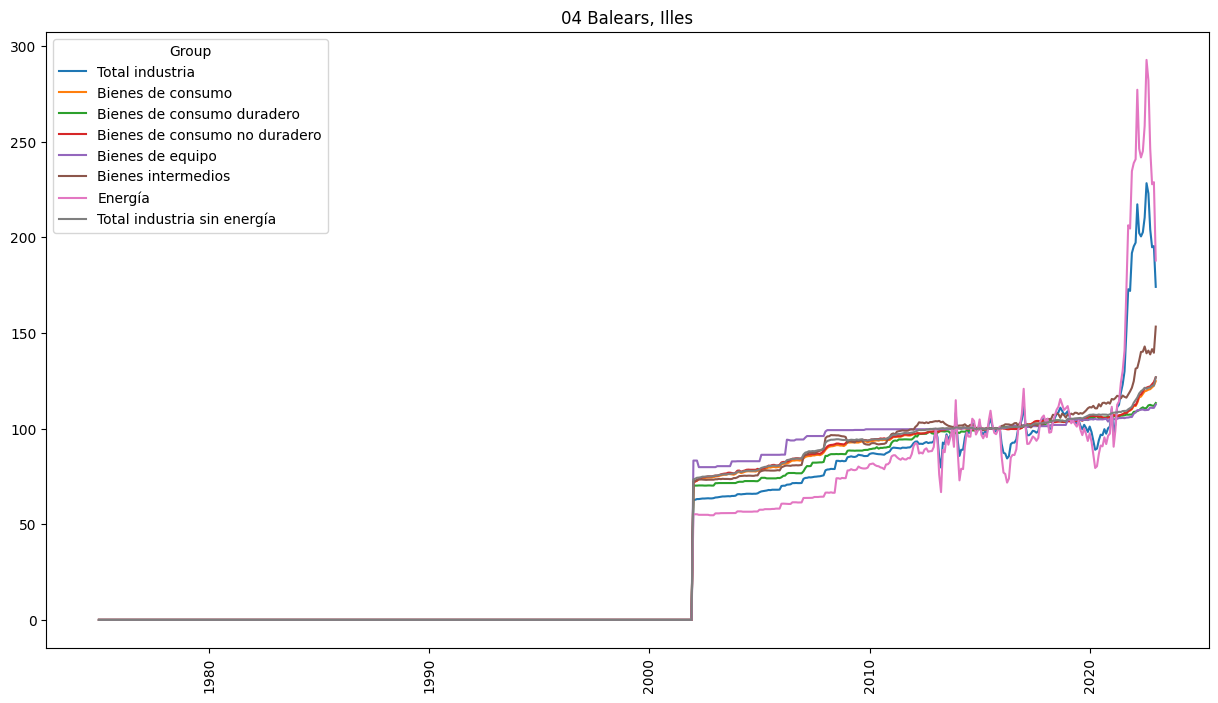

05 Canarias


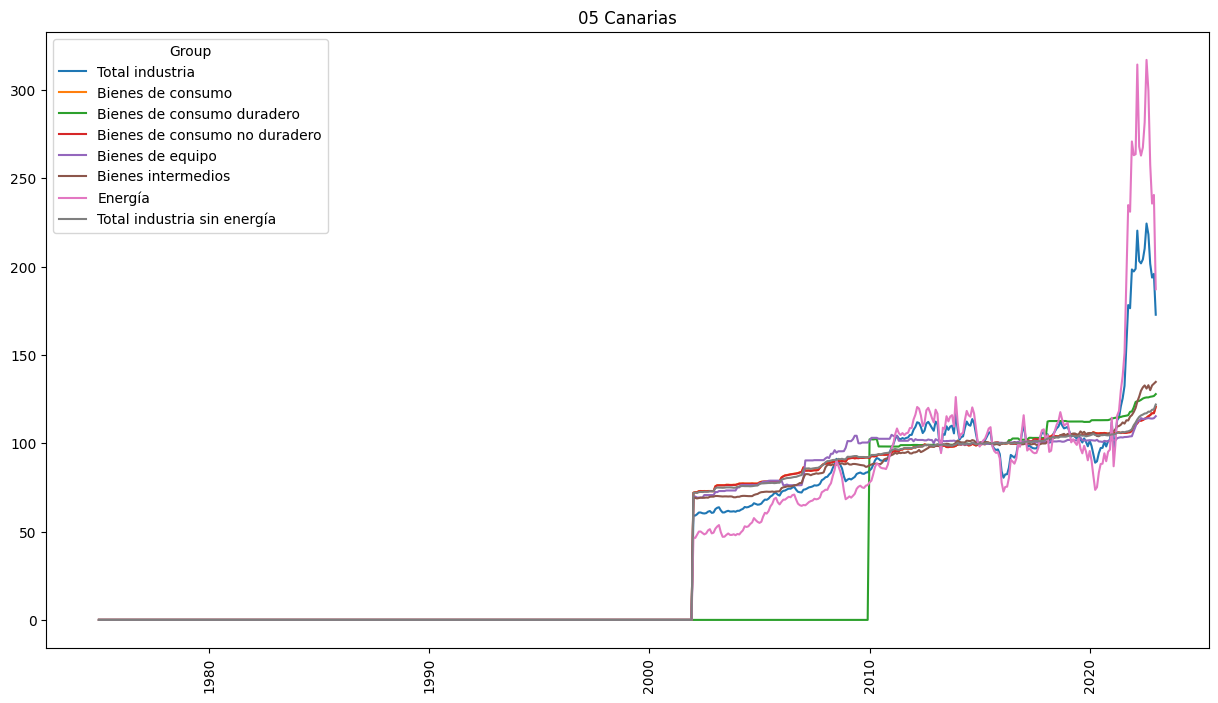

06 Cantabria


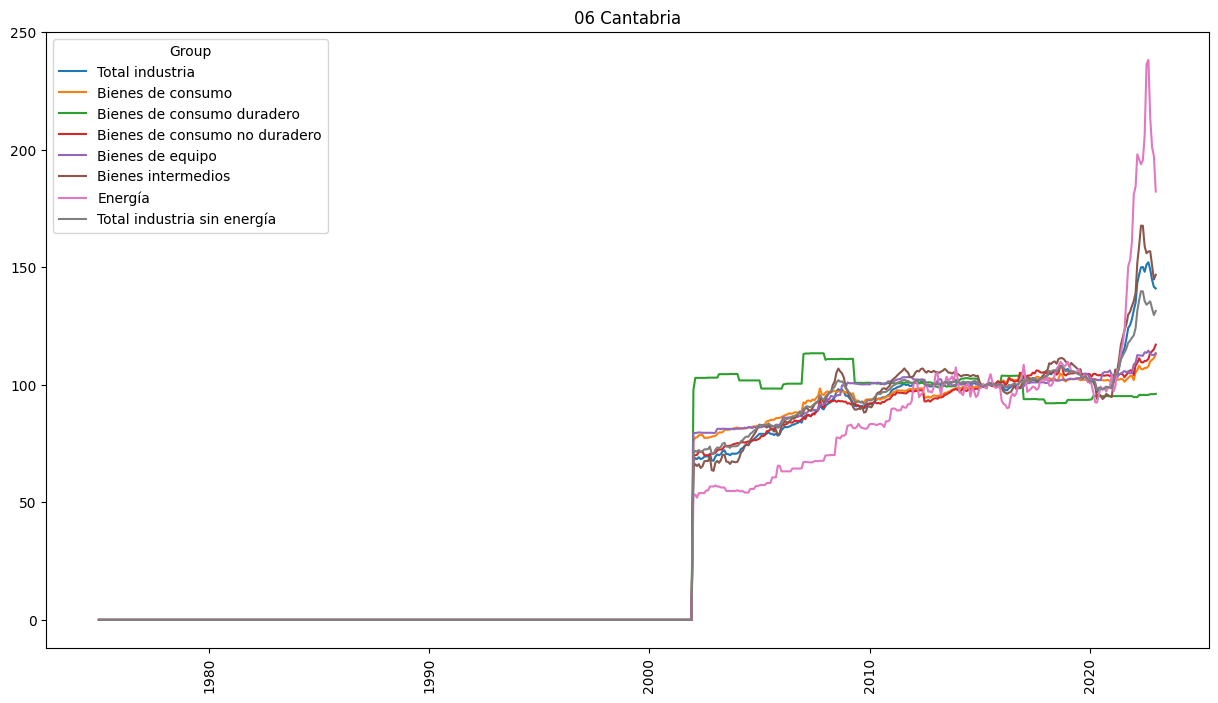

07 Castilla y León


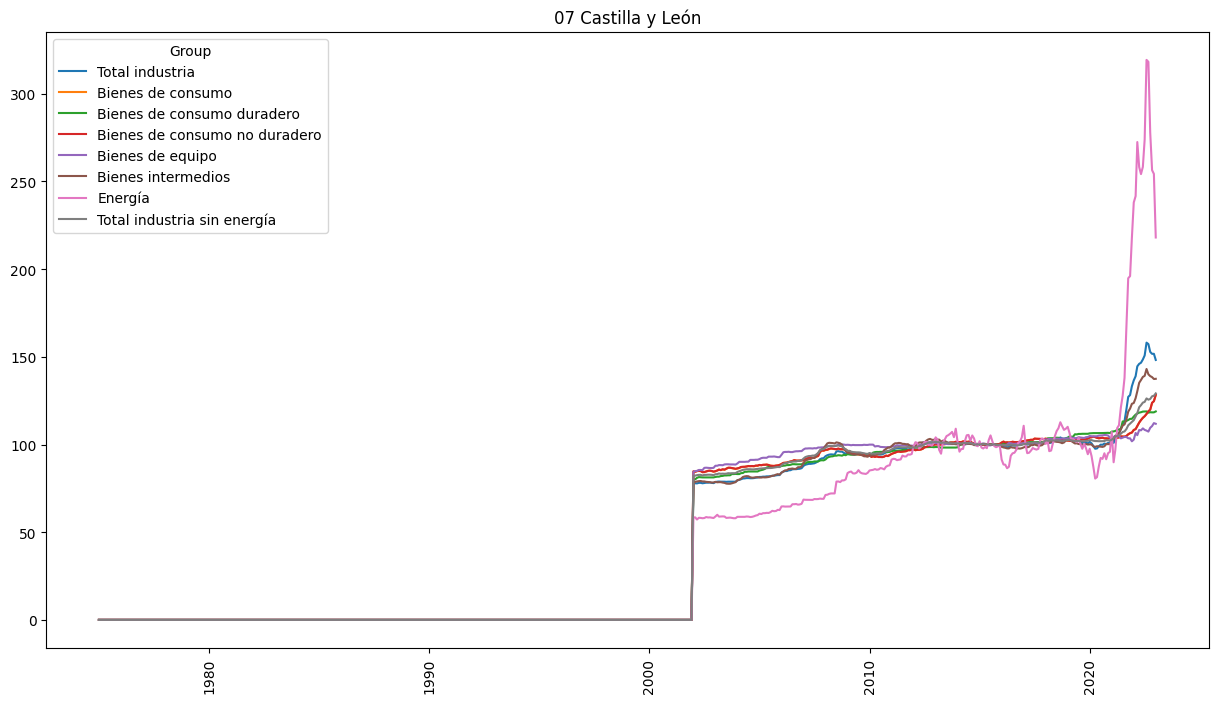

08 Castilla - La Mancha


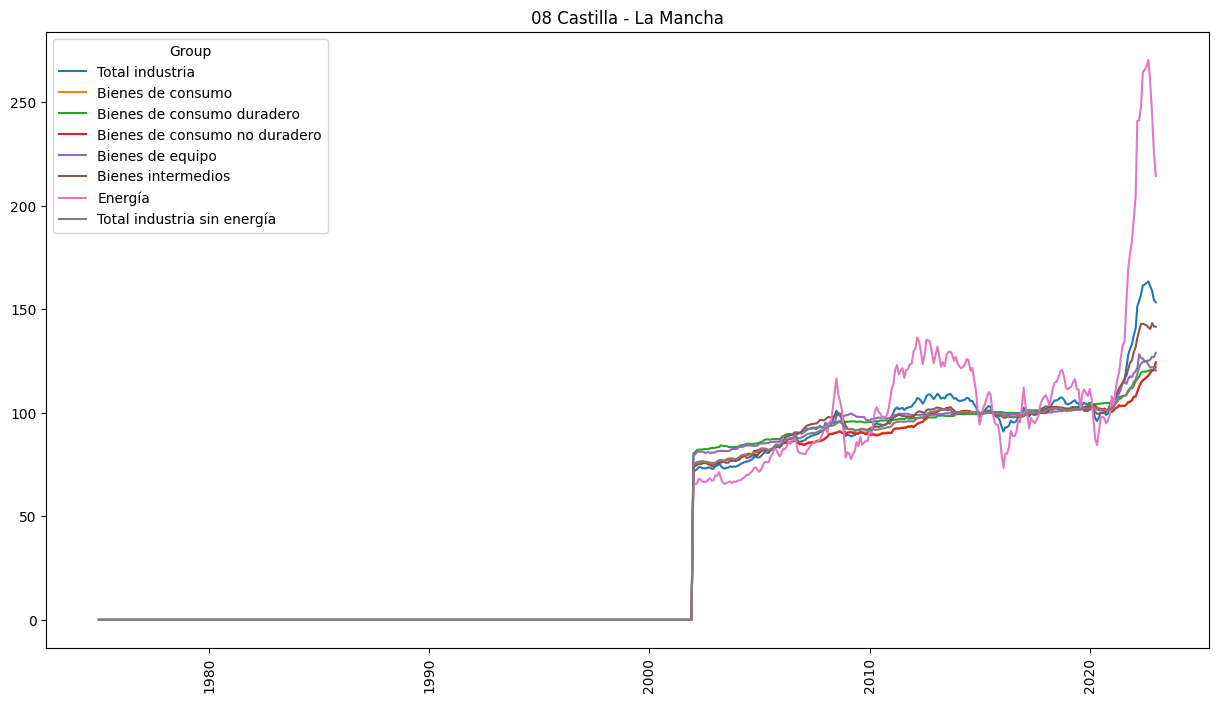

09 Cataluña


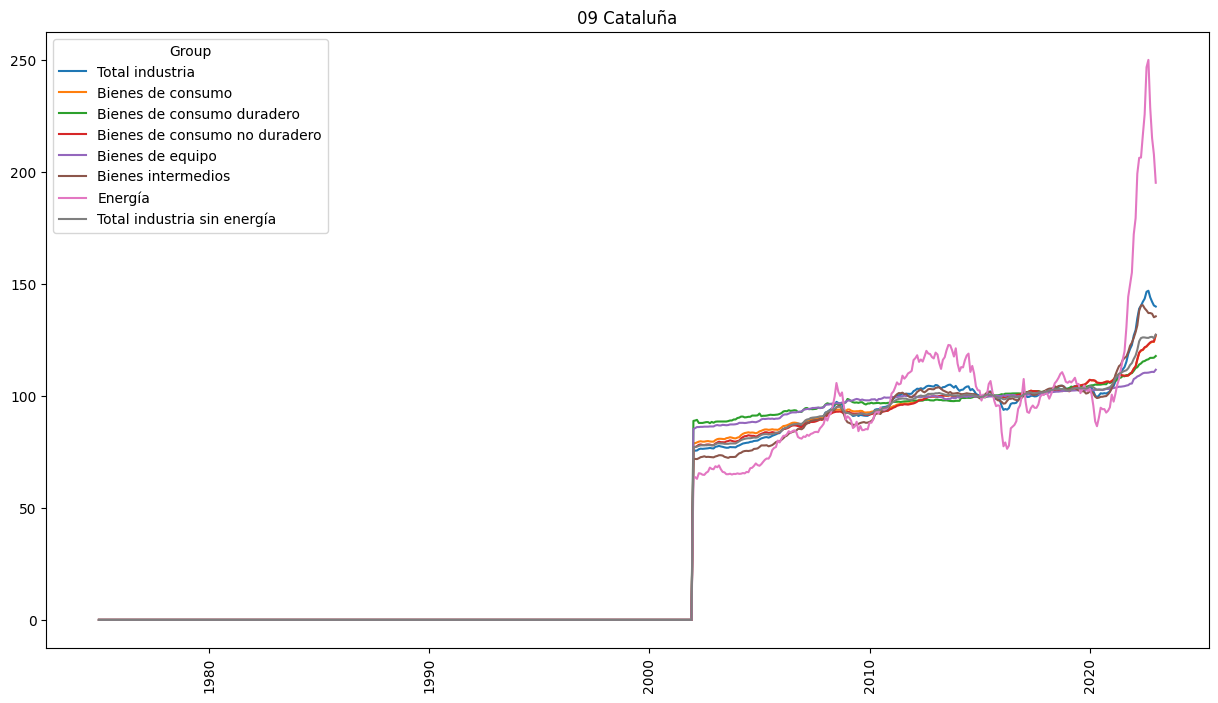

10 Comunitat Valenciana


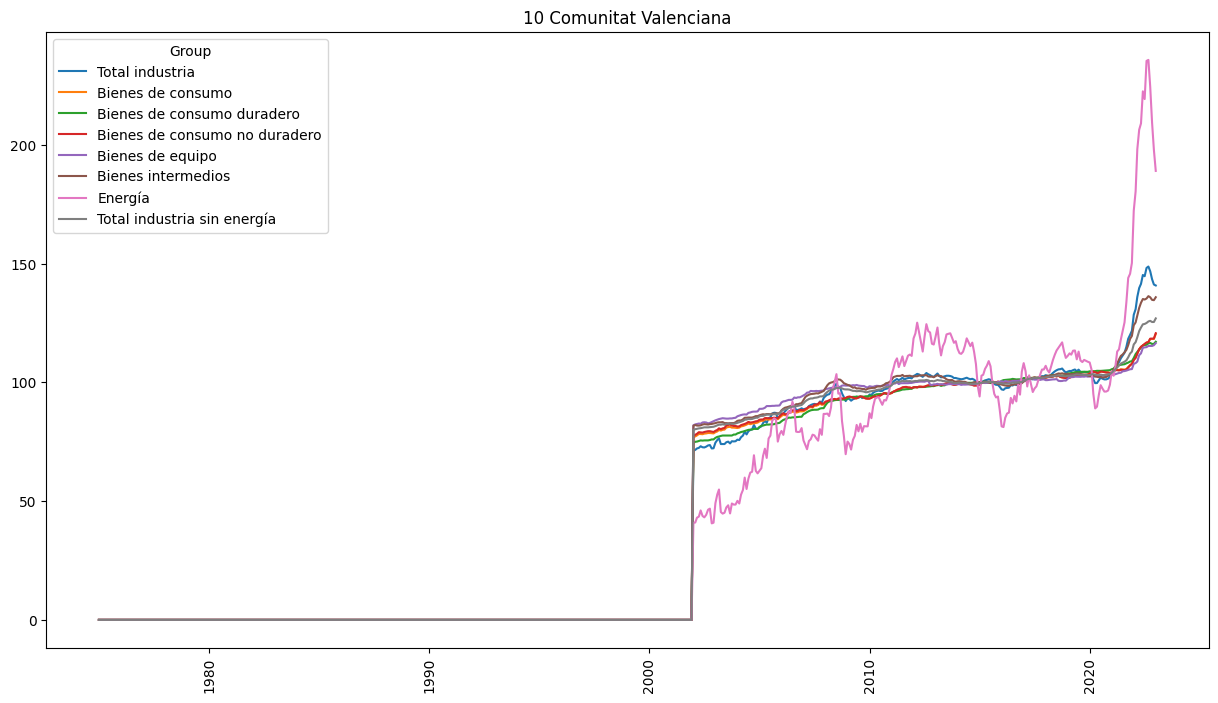

11 Extremadura


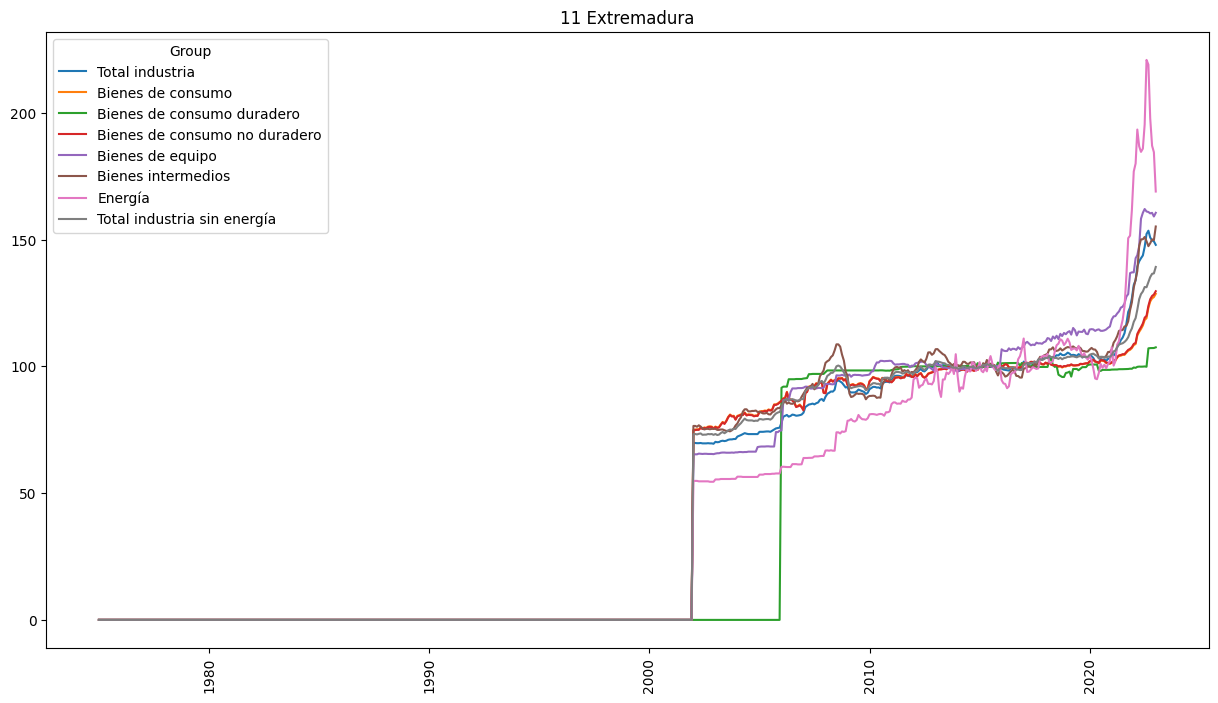

12 Galicia


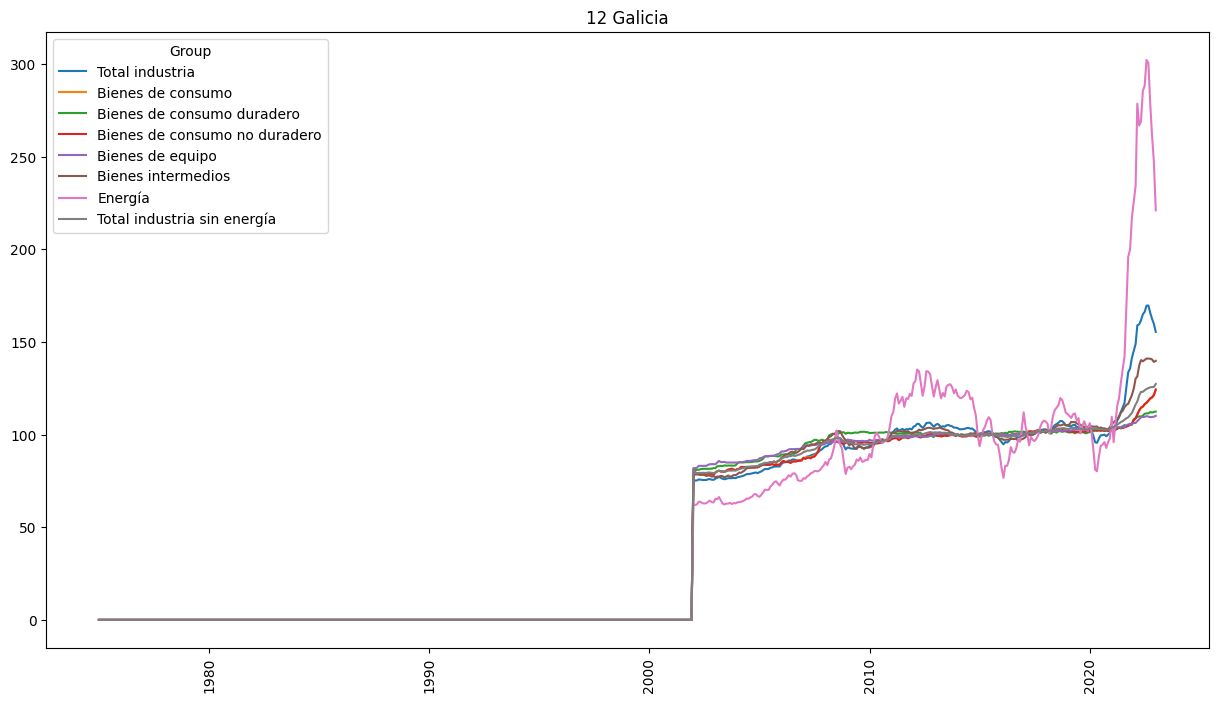

13 Madrid, Comunidad de


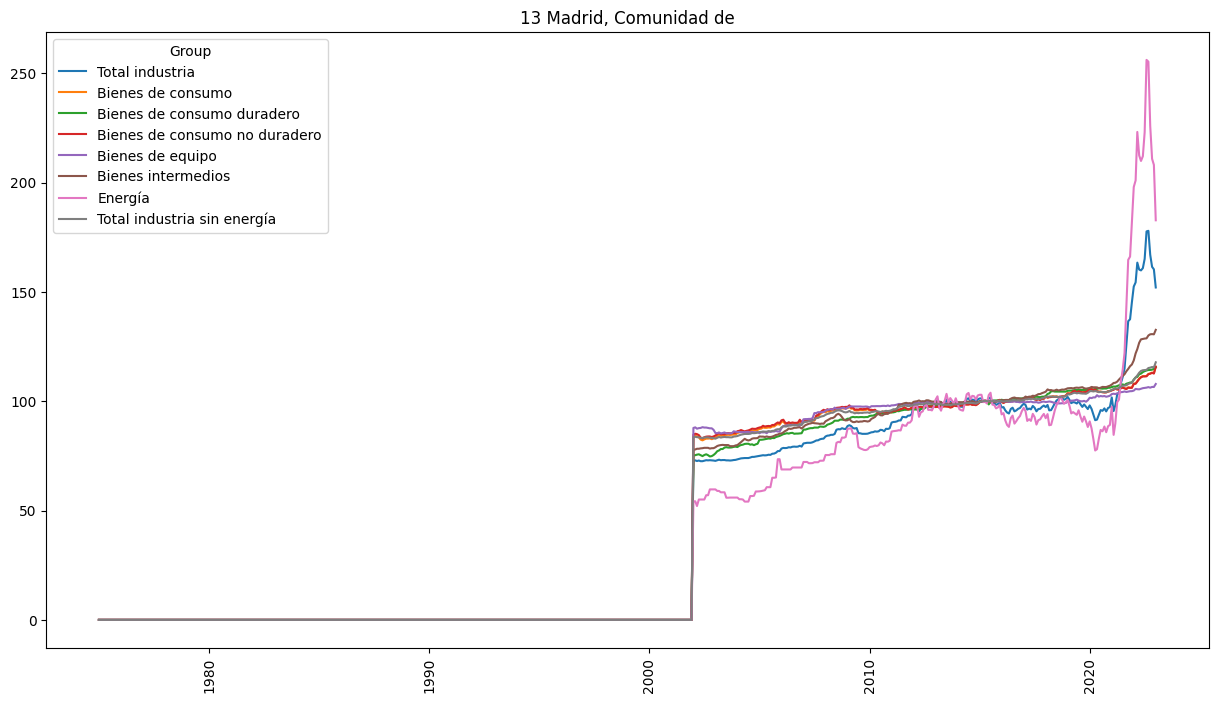

14 Murcia, Región de


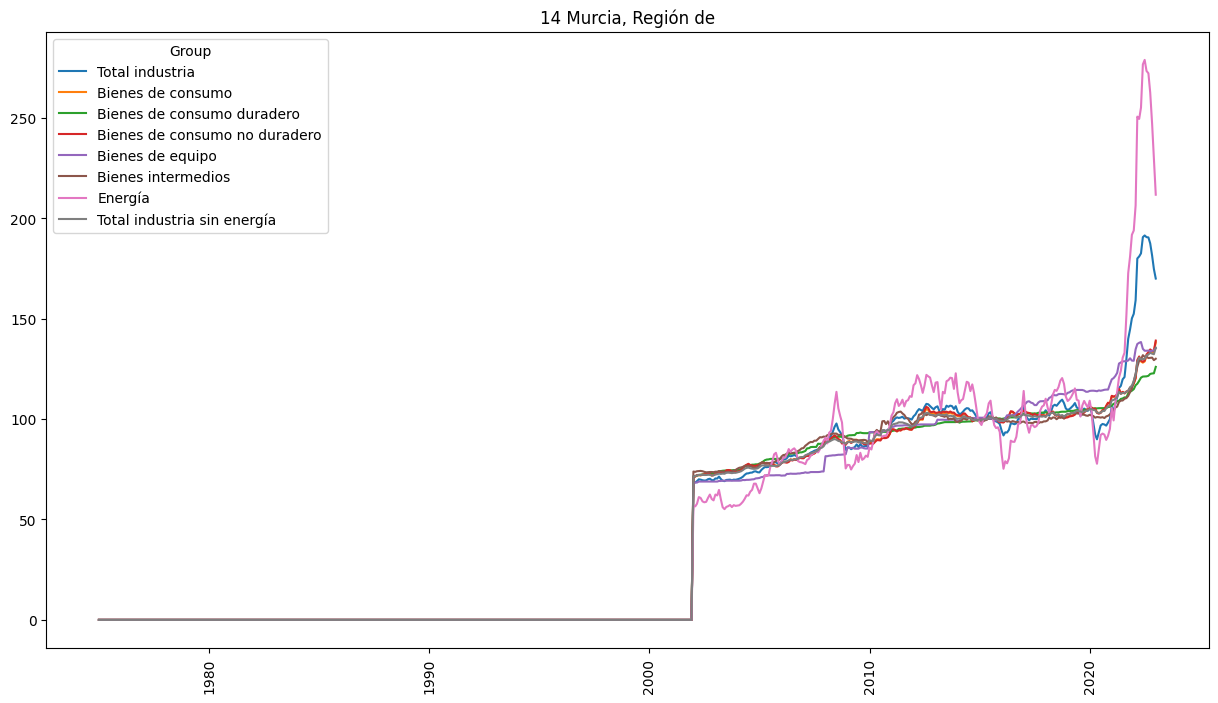

15 Navarra, Comunidad Foral de


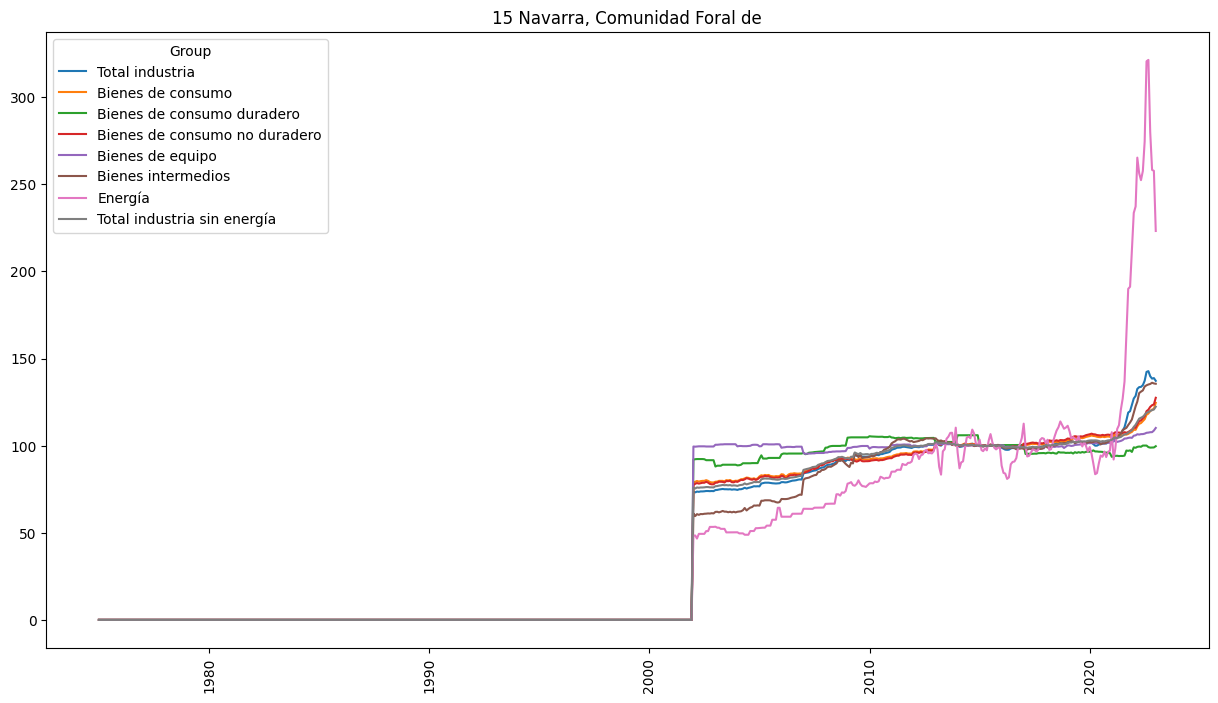

16 País Vasco


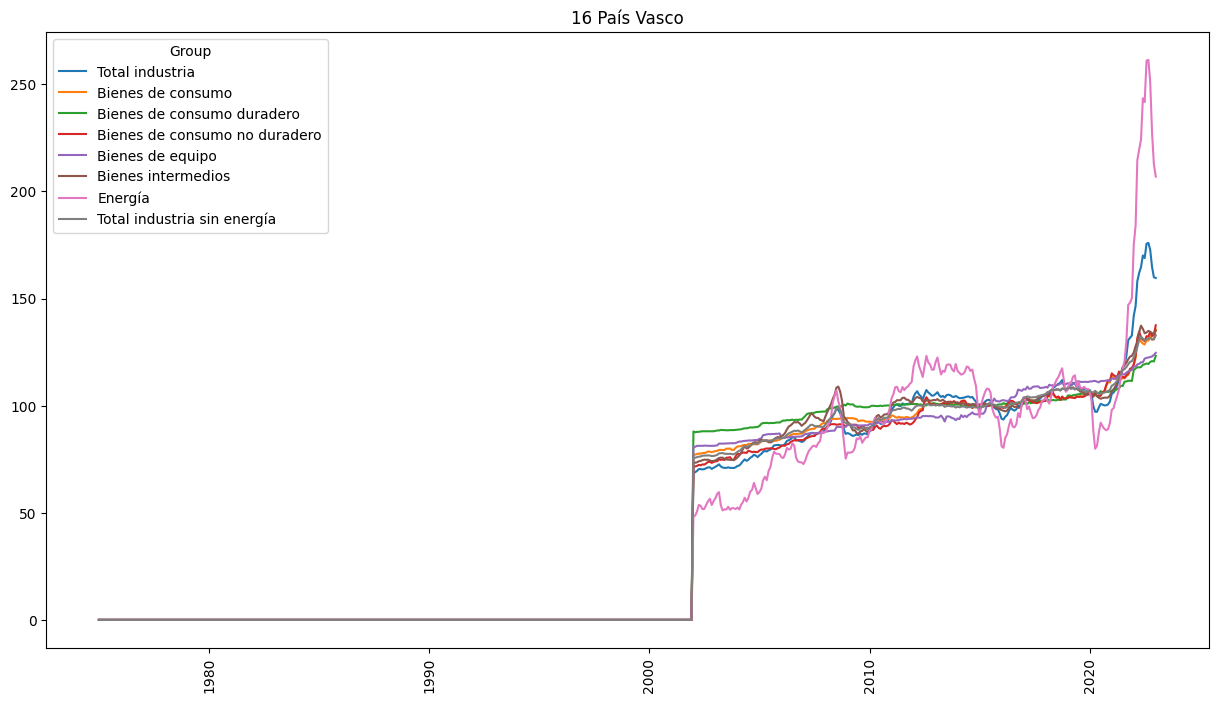

17 Rioja, La


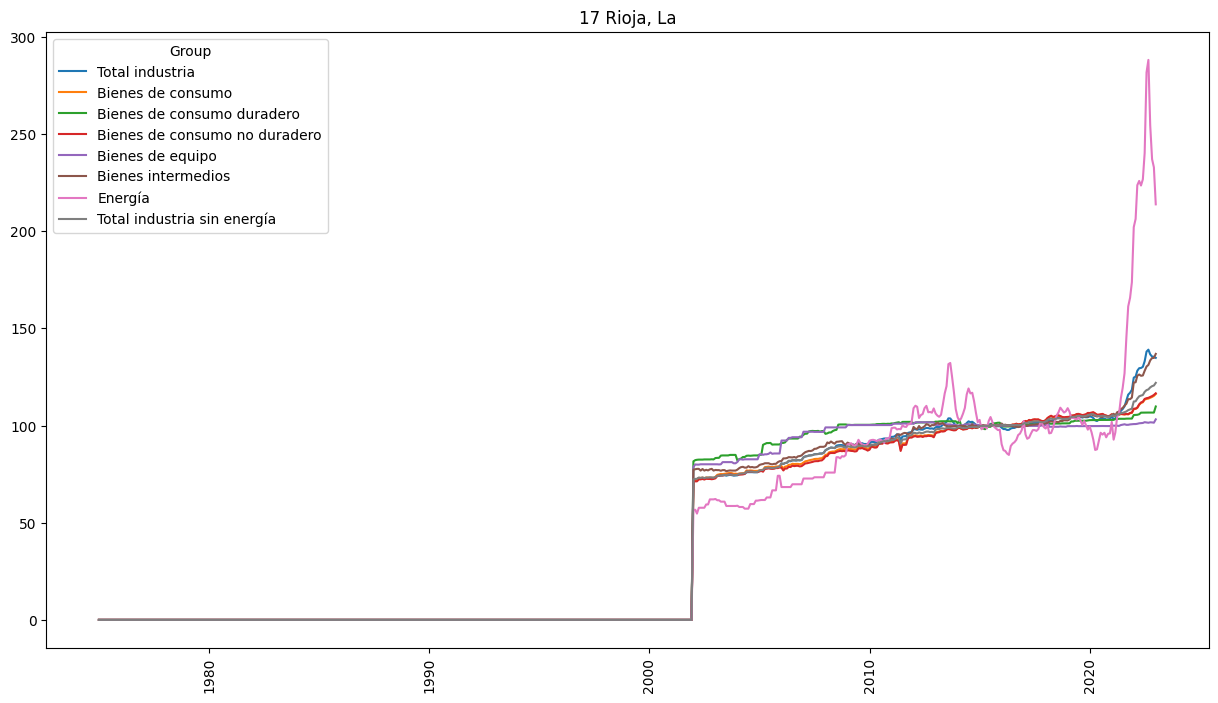

In [22]:
names = df["Name"].unique()
zones = df["Zone"].unique()

for z in zones:
    fig, ax = plt.subplots(figsize=(15, 8))
    print(z)
    dx = df[df["Zone"] == z]
    plt.title(z)
    for n in names:
        dxz = dx[dx["Name"] == n]
        plt.plot(dxz["Date"], dxz["Value"], label=f"{n}")
    plt.legend(title="Group")
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
# Guardamos la serie procesada
df.to_csv(serhi.OUT_FILE, index=False)